<a href="https://colab.research.google.com/github/Sheulynath/Assignment/blob/X-Ray-image-or-not/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 154_jpeg.rf.2f4887d7e810d71d451d738848fd9f08.jpg to 154_jpeg.rf.2f4887d7e810d71d451d738848fd9f08.jpg


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Xray_Classifier/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Xray_Classifier/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/non_xray')))

565
501
565
500


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 853 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 5s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
27/27 [==============================] - 411s 15s/step - loss: 1.7312 - accuracy: 0.5557 - val_loss: 0.9655 - val_accuracy: 0.6651
Epoch 2/3
27/27 [==============================] - 336s 12s/step - loss: 0.5787 - accuracy: 0.7093 - val_loss: 0.5852 - val_accuracy: 0.7264
Epoch 3/3
27/27 [==============================] - 324s 12s/step - loss: 0.3843 - accuracy: 0.8312 - val_loss: 0.5794 - val_accuracy: 0.7170


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 853 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


In [10]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [12]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [14]:
history = resnet_model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
27/27 [==============================] - 325s 12s/step - loss: 0.2835 - accuracy: 0.8816 - val_loss: 0.4589 - val_accuracy: 0.7783
Epoch 2/10
27/27 [==============================] - 335s 12s/step - loss: 0.2743 - accuracy: 0.8875 - val_loss: 0.4987 - val_accuracy: 0.7594
Epoch 3/10
27/27 [==============================] - 321s 12s/step - loss: 0.2282 - accuracy: 0.9086 - val_loss: 0.2583 - val_accuracy: 0.8915
Epoch 4/10
27/27 [==============================] - 314s 12s/step - loss: 0.2093 - accuracy: 0.9285 - val_loss: 0.2792 - val_accuracy: 0.9009
Epoch 5/10
27/27 [==============================] - 324s 12s/step - loss: 0.2026 - accuracy: 0.9250 - val_loss: 0.2147 - val_accuracy: 0.9104
Epoch 6/10
27/27 [==============================] - 336s 13s/step - loss: 0.2075 - accuracy: 0.9168 - val_loss: 0.2053 - val_accuracy: 0.9340
Epoch 7/10
27/27 [==============================] - 317s 12s/step - loss: 0.1500 - accuracy: 0.9437 - val_loss: 0.2033 - val_accuracy: 0.9245
Epoch 

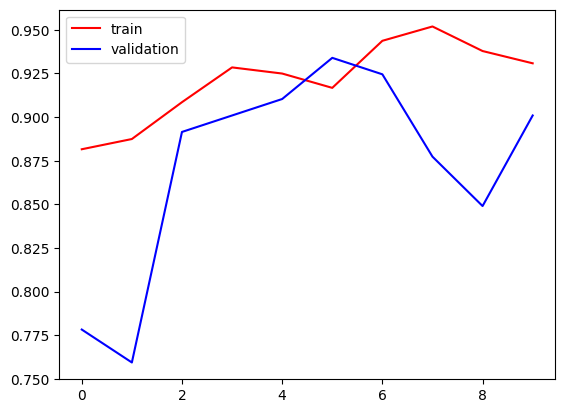

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

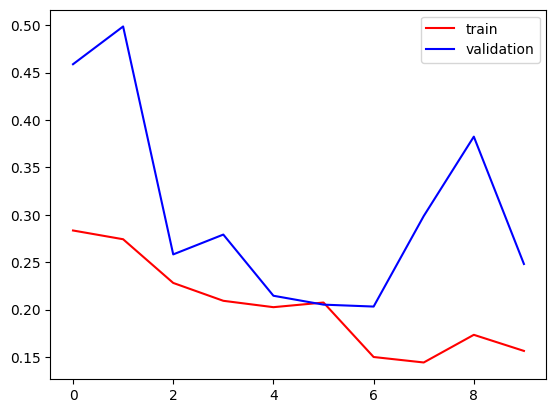

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1064 images belonging to 2 classes.


In [18]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

34/34 [==============================] - 331s 10s/step
[[0.5054419 ]
 [0.5210617 ]
 [0.50659734]
 ...
 [0.51996976]
 [0.51255274]
 [0.50321084]]


In [19]:
len(predictions)

1064

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 25 475]
 [ 21 543]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.05      0.09       500
           1       0.53      0.96      0.69       564

    accuracy                           0.53      1064
   macro avg       0.54      0.51      0.39      1064
weighted avg       0.54      0.53      0.41      1064

